<a href="https://colab.research.google.com/github/Tstrebe2/umich-mads-capstone-project/blob/main/tim-image-display-demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/capstone/assets/stage_2_train_images.zip'

!unzip {path}

In [89]:
# source code: https://medium.com/@vivek8981/dicom-to-jpg-and-extract-all-patients-information-using-python-5e6dd1f1a07d
import pydicom as dicom
import os
import cv2
import PIL # optional
# make it True if you want in PNG format
PNG = True
# Specify the .dcm folder path
folder_path = "/content"
# Specify the output jpg/png folder path
jpg_folder_path = "/content/drive/MyDrive/capstone/assets/Images"
images_path = os.listdir(folder_path)[1:9]

for n, image in enumerate(images_path):
    ds = dicom.dcmread(os.path.join(folder_path, image))
    pixel_array_numpy = ds.pixel_array
    if PNG == False:
        image = image.replace('.dcm', '.jpg')
    else:
        image = image.replace('.dcm', '.png')
    cv2.imwrite(os.path.join(jpg_folder_path, image), pixel_array_numpy)
    if n % 50 == 0:
        print('{} image converted'.format(n))

0 image converted


In [112]:
import pandas as pd

df_labels = pd.read_csv('/content/drive/MyDrive/capstone/assets/stage_2_train_labels.csv.zip', index_col='patientId')
df_labels.head(2)

,x,y,width,height,Target
patientId,,,,,
0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0


acf7162d-7181-4d50-83c8-9a76ae222210.png
No-Pneumonia


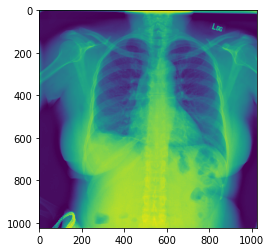

In [107]:
import matplotlib.pyplot as plt
import torchvision
path = '/content/drive/MyDrive/capstone/assets/Images/'
file = os.listdir(path)[3]
print(file)
label = df_labels.loc[file[:-4]].Target
label_map = {0:'No-Pneumonia', 1:'Pneumonia'}

image = torchvision.io.read_image(os.path.join(path, file))
print(label_map[label])
plt.imshow(image[0])

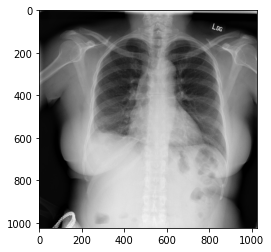

In [110]:
plt.imshow(image[0], cmap='gray')

In [108]:
df_labels.Target.value_counts()

0    20672
1     9555
Name: Target, dtype: int64